<a href="https://colab.research.google.com/github/WittmannF/deep-learning-keras/blob/master/modulo-2/primeira-rede-neural-resolvido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sua Primeira Rede Neural

Vamos usar o mesmo exemplo que temos visto no vídeo anterior com o preço de casa com base em sua área:
![input-example](https://user-images.githubusercontent.com/5733246/52136634-a2e8e080-262f-11e9-8f7a-61d79831d83d.png)
Normalmente, quando se trabalha com problemas de aprendizagem de máquina ou profunda aprendizagem, você terá que seguir esses cinco passos:

1. Explorando os dados
   - Importação de dados
   - Compreender os dados

2. Preparar os dados
   - Scaling
   - Transformando
   - One-Hot Encoding
   - Train teste de divisão

3. Desenvolver um modelo básico
4. Verificação das Previsões
5. Melhoria dos Resultados

## 1. Importar os Dados

Vamos criar um conjunto de dados brinquedo na mão, com apenas 20 áreas e 20 preços:

In [0]:
import numpy as np

X = np.array([40, 45, 50, 55, 60, 70, 80, 86, 90, 100, 110, 111, 120, 132, 140, 149, 160, 171, 180, 191])
y = np.array([51000, 62000, 70100, 75245, 82200, 91200, 101000, 110200, 120000, 130000, 150000, 170000, 180000, 190000, 200000, 205000, 210000, 220000, 235000, 250000])

In [0]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

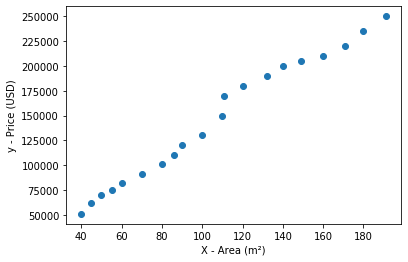

In [14]:
import matplotlib.pyplot as plt
plt.xlabel("X - Area (m²)")
plt.ylabel("y - Price (USD)")
plt.scatter(X, y)

## 2. Preparando os Dados
### Escalando Atributos Numéricos
Otimizadores funcionam melhor quando os dados de entrada estão dentro de uma mesma escala, por exemplo de -1 a 1 ou entre 0 a 1. Isto ajuda a superfície de erro para aproximar mais rápido para o mínimo global. Para melhores resultados, o método chamando [Standardization (Padronização ou Uniformização)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) é altamente sugerido pois converte a média para zero e o desvio padrão para 1. 
- Para familiarização com Desvio Padrão e Média, recomendo a seguinte leitura: https://medium.com/data-science-br/reproduzindo-uma-distribui%C3%A7%C3%A3o-normal-jogando-cara-ou-coroa-e6d77b490b91

In [0]:
X = (X - X.mean())/X.std()
y = (y - y.mean())/y.std()

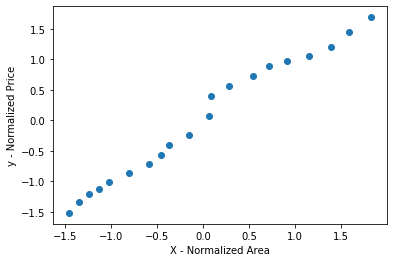

In [24]:
plt.scatter(X, y)
plt.xlabel("X - Normalized Area")
plt.ylabel("y - Normalized Price")
plt.show()

### Divisão dos Dados em Conjuntos de Treinamento e Teste
Além de escalar os dados, é muito importante para dividir o conjunto de dados para treinamento e teste. O conjunto de treinamento vai ser usado para ajustar o modelo (ou fronteira de decisão) e o conjunto de teste vai ser usado para avaliar o seu desempenho em dados não vistos. Se não utilizar um conjunto de teste, há um risco de a rede neural "memorizar" os dados de treinamento, fenômeno conhecido por **overfitting**, ilustrado a seguir:
![underfit](https://i.ytimg.com/vi/dBLZg-RqoLg/maxresdefault.jpg)


Podemos usar a biblioteca de machine learning scikit-learn para a divisão treino/teste:

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

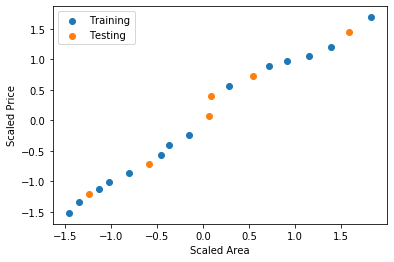

In [30]:
# Visualize again
plt.scatter(X_train, y_train, label="Training")
plt.scatter(X_test, y_test, label="Testing")
plt.legend(loc=0)
plt.xlabel("Scaled Area")
plt.ylabel("Scaled Price")
plt.show()

## 3. Desenvolver um modelo base
Três componentes que você precisa ter ciência:
- Arquitetura: Número de camadas ocultas e neuronios em cada camada
   - https://keras.io/layers/core/
   - https://keras.io/getting-started/sequential-model-guide/
- Otimizadores e Função de Custo
   - https://keras.io/optimizers/
   - https://keras.io/losses/
   - https://keras.io/models/sequential/#compile
   
- Treinar o modelo:
   - https://keras.io/models/sequential/#fit

In [36]:
# 0. Import keras dependencies 
# TODO: Import the sequential model - https://keras.io/getting-started/sequential-model-guide/
from keras.models import Sequential

# TODO: Import the dense layer - https://keras.io/layers/core/
from keras.layers import Dense


# 1. Define your base model here
# TODO: Assign Sequential to model and create a list with just one Dense layer with one unit and one input
model = Sequential([
                    Dense(1, input_shape=(1,))
])


In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [39]:
# TODO: Import the SGD optimizer - https://keras.io/optimizers/
from keras.optimizers import SGD

# 2. Set your optimizer and loss function here
# TODO: Initialize the Stochastic Gradient Descent optimizer

# TODO: Use the model.compile method with the inputs 'optimizer' and 'loss'
model.compile(optimizer=SGD(), loss='mean_squared_error')



In [40]:
# 3. Train your model
# TODO: Use the model.fit method with the the training data as input
model.fit(X_train, y_train)




Epoch 1/1





14/14 [==============================] - 9s 660ms/step - loss: 0.4692


## 4. Verificar Previsões
Agora vamos ver o quão bem a nossa previsão de base está realizando:

In [42]:
model.predict(X_test)

array([[ 0.19461782],
       [ 0.03045101],
       [-0.44641453],
       [ 0.02263354],
       [-0.21189049],
       [ 0.5698563 ]], dtype=float32)

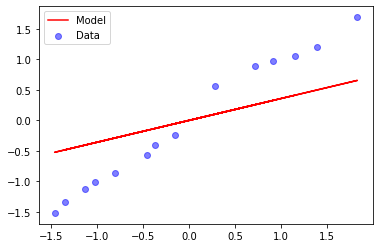

In [43]:
def check_predictions(model, X, y):
    y_pred = model.predict(X)
    plt.scatter(X, y, c='b', alpha=0.5, label="Data")
    plt.plot(X, y_pred, c='r', label="Model")
    plt.legend(loc=0)
    plt.show()
    
check_predictions(model, X_train, y_train)

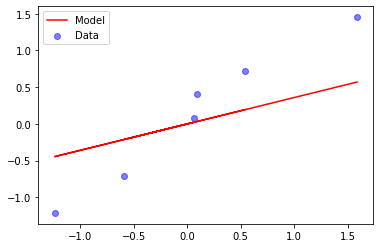

In [44]:
check_predictions(model, X_test, y_test)

In [46]:
model.evaluate(X_train, y_train)

14/14 [==============================] - 0s 255us/step


0.4494476914405823

In [45]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step


0.3401762545108795

## 5. Melhoria de Resultados
Podemos ver que o modelo não é apropriado. Vamos agora melhorar esses resultados! Aqui estão algumas coisas básicas que vamos tentar:
1. Aumentar o número de épocas
- Épocas é o número de vezes que o algoritmo vê todo o conjunto de dados. 
2. Alterar o otimizador
- Descida gradiente estocástico é muito simple. Há otimizadores mais robustos como Adam
3. Alterar a taxa de aprendizagem (learning rate)
4. Adição de mais camadas

### 5.1 Aumentar o número de épocas

In [55]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(1,))
    ])

# 2. Set your optimizer and loss function here
opt = SGD()
model.compile(optimizer=opt,
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 14 samples, validate on 6 samples
Epoch 1/5
14/14 [==============================] - 0s 10ms/step - loss: 3.2716 - val_loss: 2.2645
Epoch 2/5
14/14 [==============================] - 0s 325us/step - loss: 3.1306 - val_loss: 2.1684
Epoch 3/5
14/14 [==============================] - 0s 308us/step - loss: 2.9956 - val_loss: 2.0764
Epoch 4/5
14/14 [==============================] - 0s 260us/step - loss: 2.8666 - val_loss: 1.9883
Epoch 5/5
14/14 [==============================] - 0s 302us/step - loss: 2.7431 - val_loss: 1.9041


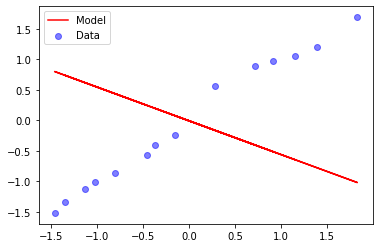

In [56]:
check_predictions(model, X_train, y_train)

### 5.2 Trocar de Otimizadores
Ótimo repositório comparando diferentes otimizadores de TensorFlow: https://github.com/Jaewan-Yun/optimizer-visualization
![](https://github.com/Jaewan-Yun/optimizer-visualization/raw/master/figures/movie11.gif)
![](https://github.com/Jaewan-Yun/optimizer-visualization/raw/master/figures/movie9.gif)

Vamos agora tentar outros otimizadores que estão disponíveis a partir da documentação: https://keras.io/optimizers/

In [57]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(1,))
    ])

# 2. Set your optimizer loss function here
model.compile(optimizer=Adam(),
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
14/14 [==============================] - 0s 14ms/step - loss: 1.4622
Epoch 2/5
14/14 [==============================] - 0s 292us/step - loss: 1.4596
Epoch 3/5
14/14 [==============================] - 0s 278us/step - loss: 1.4570
Epoch 4/5
14/14 [==============================] - 0s 278us/step - loss: 1.4543
Epoch 5/5
14/14 [==============================] - 0s 310us/step - loss: 1.4517


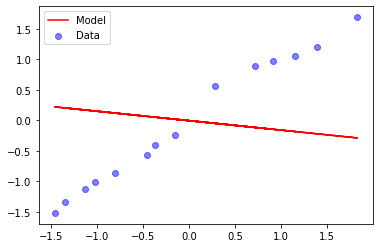

In [58]:
check_predictions(model, X_train, y_train)

### 5.3 Alterando o Learning Rate (Taxa de Aprendizagem)
Finalmente vamos aumentar a taxa de aprendizagem. Como um lembrete, valores pequenos requer mais iterações, enquanto grandes valores tornar o modelo a divergir.

In [0]:
Adam

In [70]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(1,))
    ])

# 2. Set your optimizer and loss function here
# Default of adam is 0.001. Check large and small values, use a value slighly lower than a diverging lr
model.compile(optimizer=Adam(lr=0.1),
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Train on 14 samples, validate on 6 samples
Epoch 1/20
14/14 [==============================] - 0s 27ms/step - loss: 0.2399 - val_loss: 0.1509
Epoch 2/20
14/14 [==============================] - 0s 422us/step - loss: 0.1553 - val_loss: 0.0916
Epoch 3/20
14/14 [==============================] - 0s 295us/step - loss: 0.0863 - val_loss: 0.0494
Epoch 4/20
14/14 [==============================] - 0s 335us/step - loss: 0.0420 - val_loss: 0.0299
Epoch 5/20
14/14 [==============================] - 0s 385us/step - loss: 0.0211 - val_loss: 0.0264
Epoch 6/20
14/14 [==============================] - 0s 381us/step - loss: 0.0158 - val_loss: 0.0328
Epoch 7/20
14/14 [==============================] - 0s 378us/step - loss: 0.0215 - val_loss: 0.0445
Epoch 8/20
14/14 [==============================] - 0s 330us/step - loss: 0.0341 - val_loss: 0.0557
Epoch 9/20
14/14 [==============================] - 0s 373us/step - loss: 0.0472 - val_loss: 0.0615
Epoch 10/20
14/14 [==============================] - 0s 33

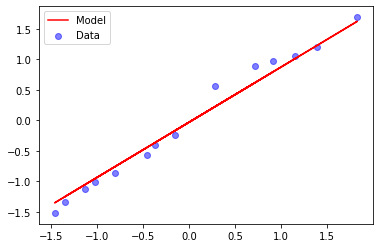

In [71]:
check_predictions(model, X_train, y_train)

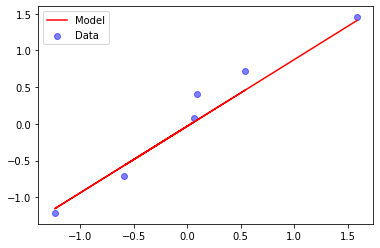

In [72]:
check_predictions(model, X_test, y_test)

### 5.4 Adição de Camadas

In [77]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 1. Define your base model here
model = Sequential([
        Dense(units=100, input_shape=(1,), activation='relu'),
        Dense(units=100, activation='relu'),
        Dense(1)
    ])

# 2. Set your optimizer and loss function here
# Default of adam is 0.001. Check large and small values, use a value slighly lower than a diverging lr
model.compile(optimizer=Adam(lr=0.1),
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Train on 14 samples, validate on 6 samples
Epoch 1/20
14/14 [==============================] - 0s 35ms/step - loss: 1.0726 - val_loss: 4.3187
Epoch 2/20
14/14 [==============================] - 0s 745us/step - loss: 6.0229 - val_loss: 1.9706
Epoch 3/20
14/14 [==============================] - 0s 389us/step - loss: 2.6612 - val_loss: 1.0385
Epoch 4/20
14/14 [==============================] - 0s 290us/step - loss: 1.4631 - val_loss: 0.7495
Epoch 5/20
14/14 [==============================] - 0s 342us/step - loss: 1.0214 - val_loss: 0.8170
Epoch 6/20
14/14 [==============================] - 0s 364us/step - loss: 1.0235 - val_loss: 0.7905
Epoch 7/20
14/14 [==============================] - 0s 372us/step - loss: 0.9798 - val_loss: 0.5350
Epoch 8/20
14/14 [==============================] - 0s 351us/step - loss: 0.6729 - val_loss: 0.1554
Epoch 9/20
14/14 [==============================] - 0s 305us/step - loss: 0.1465 - val_loss: 0.7468
Epoch 10/20
14/14 [==============================] - 0s 33

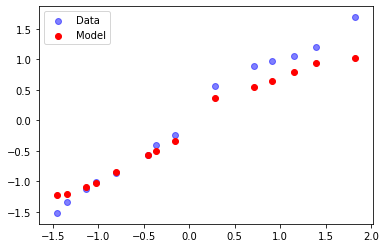

In [78]:
def check_predictions(model, X, y):
    y_pred = model.predict(X)
    plt.scatter(X, y, c='b', alpha=0.5, label="Data")
    plt.scatter(X, y_pred, c='r', label="Model")
    plt.legend(loc=0)
    plt.show()
    

check_predictions(model, X_train, y_train)

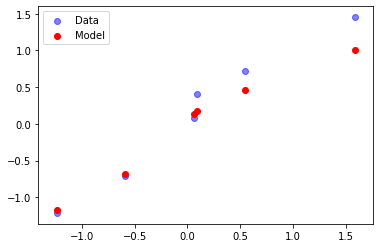

In [79]:
check_predictions(model, X_test, y_test)